In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta
import warnings 
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.api import Holt 

In [2]:
df = pd.read_csv("Coronavirus_disease.csv")
df.head(20)

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
5,2020-01-22,Antigua and Barbuda,0,0,0
6,2020-01-22,Argentina,0,0,0
7,2020-01-22,Armenia,0,0,0
8,2020-01-22,Australia,0,0,0
9,2020-01-22,Austria,0,0,0


In [3]:
df.tail(10)

,Date,Country,Confirmed,Recovered,Deaths
23678,2020-05-26,United Kingdom,266599,1161,37130
23679,2020-05-26,Uruguay,789,638,22
23680,2020-05-26,Uzbekistan,3290,2636,14
23681,2020-05-26,Venezuela,1211,302,11
23682,2020-05-26,Vietnam,327,272,0
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7
23687,2020-05-26,Zimbabwe,56,25,4


In [4]:
df.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [5]:
df.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

In [6]:
df.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


In [7]:
print("Checking for null vales",df.isnull().sum())

Checking for null vales Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64


In [8]:
df.shape

(23688, 5)

In [9]:
df.isna().any()

Date         False
Country      False
Confirmed    False
Recovered    False
Deaths       False
dtype: bool

In [10]:
df["Date"]=pd.to_datetime(df["Date"])

In [11]:
datewise=df.groupby(["Date"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})

In [12]:
print("Information")
print("Total number of Confirmed cases around the world",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered cases around the world",datewise["Recovered"].iloc[-1])
print("Total number of Death cases around the world",datewise["Deaths"].iloc[-1])
print("Total number of Active cases around the world",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("Total number of Closed cases around the world",(datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1]))


Information
Total number of Confirmed cases around the world 5589626
Total number of Recovered cases around the world 2286956
Total number of Death cases around the world 350453
Total number of Active cases around the world 2952217
Total number of Closed cases around the world 2637409


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125]),
 <a list of 126 Text xticklabel objects>)

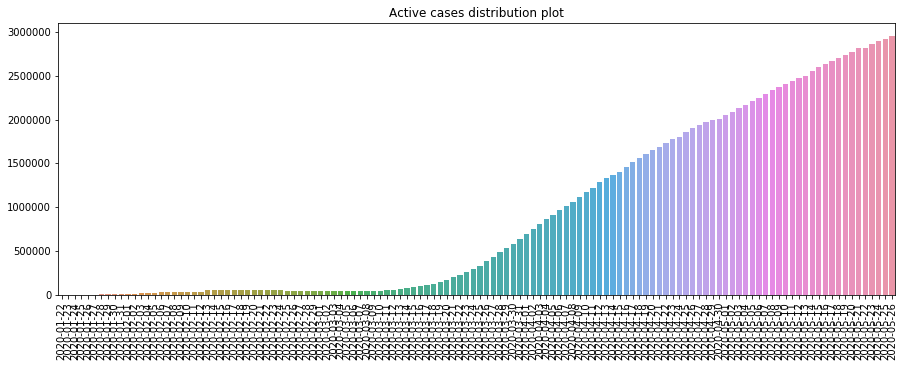

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("Active cases distribution plot")
plt.xticks(rotation=90)

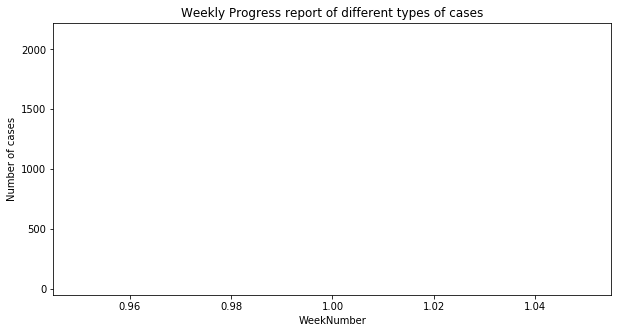

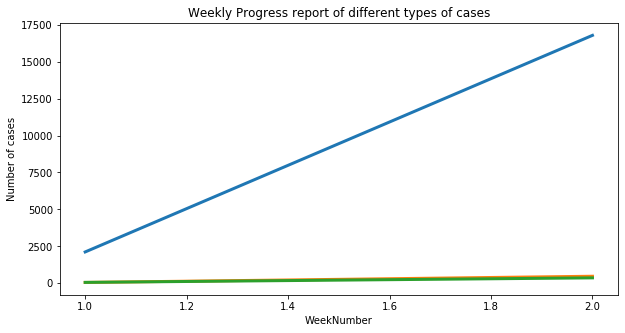

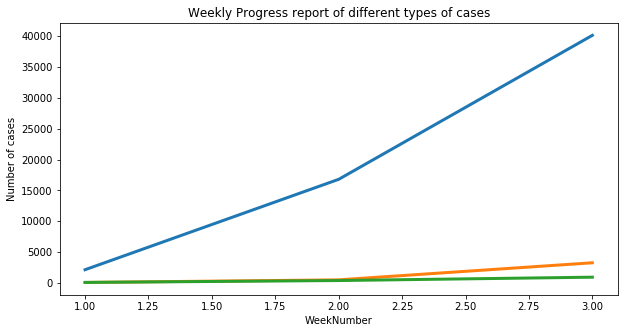

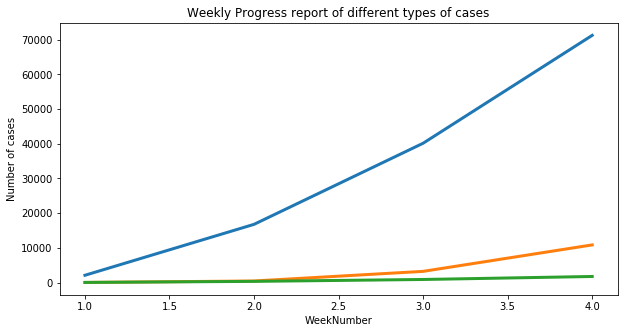

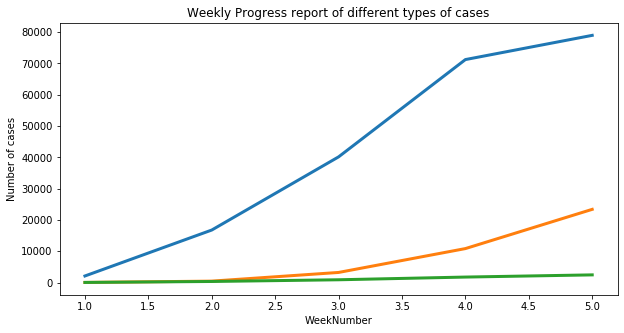

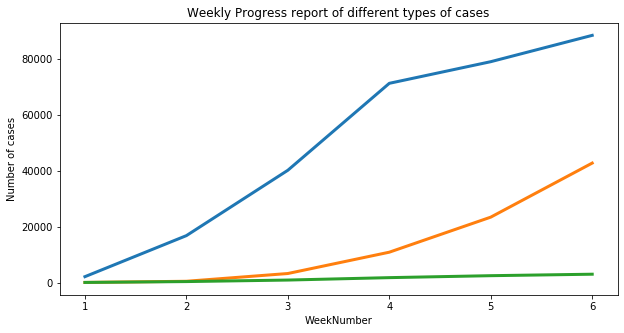

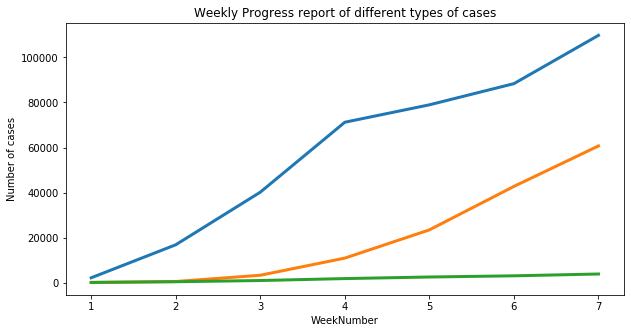

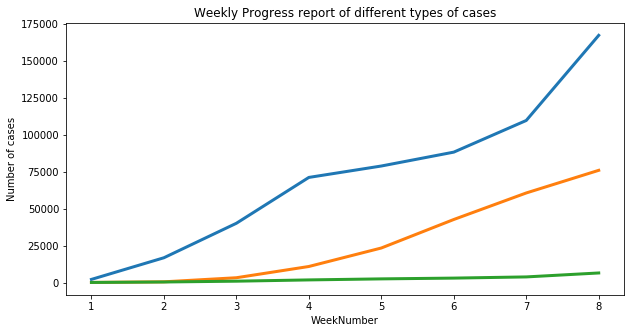

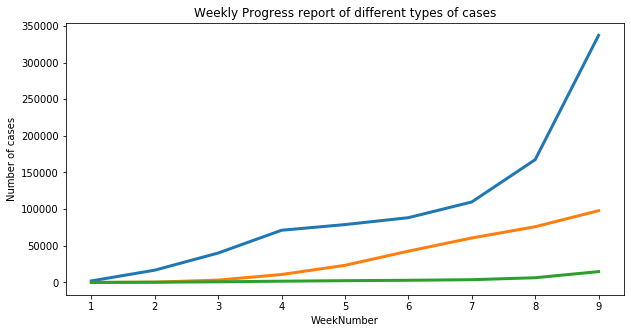

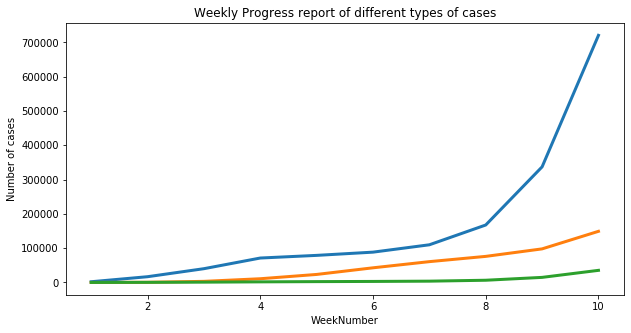

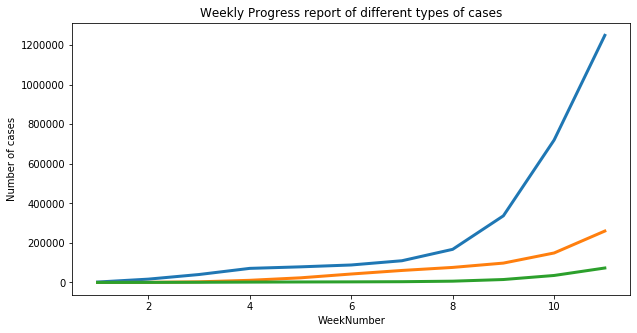

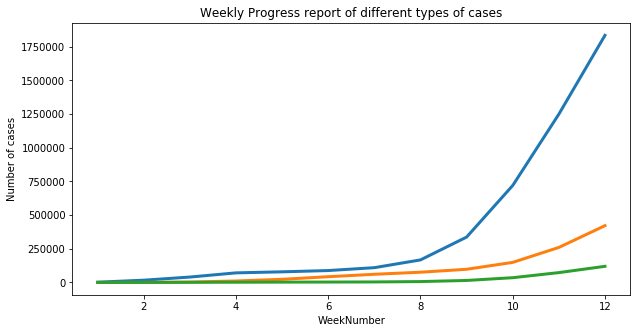

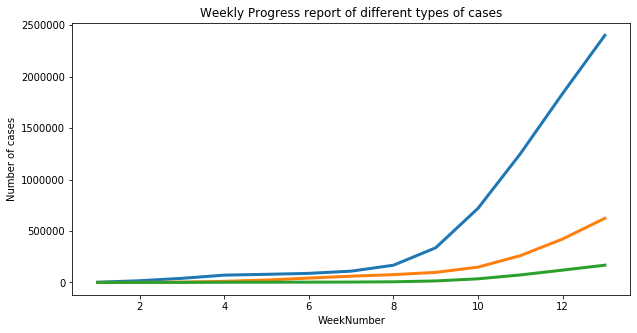

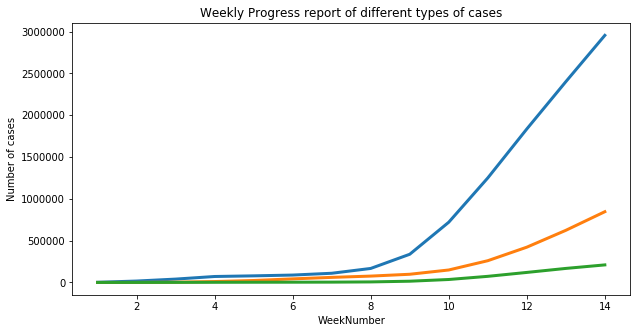

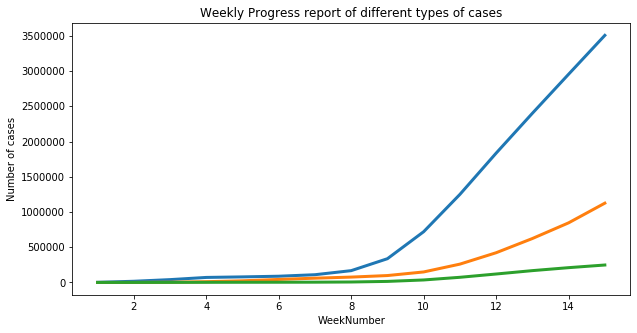

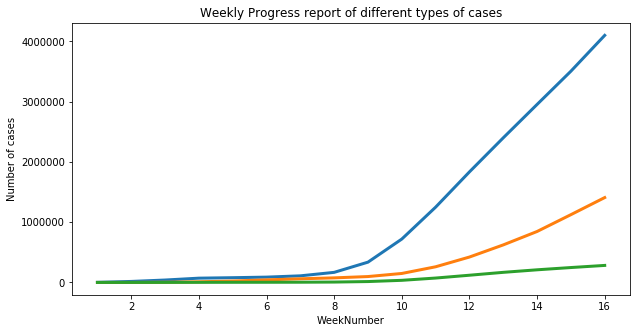

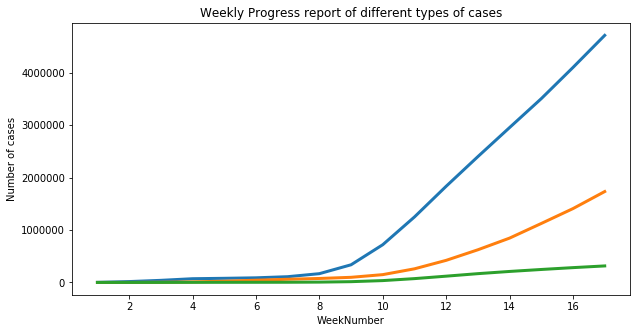

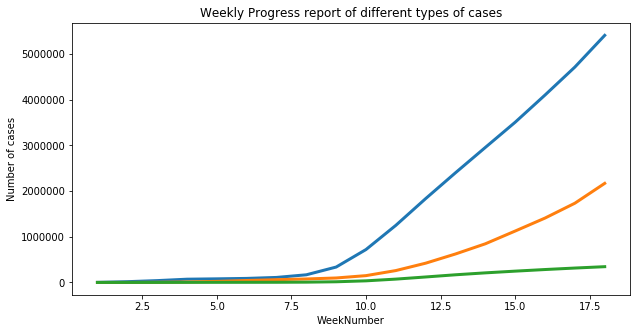

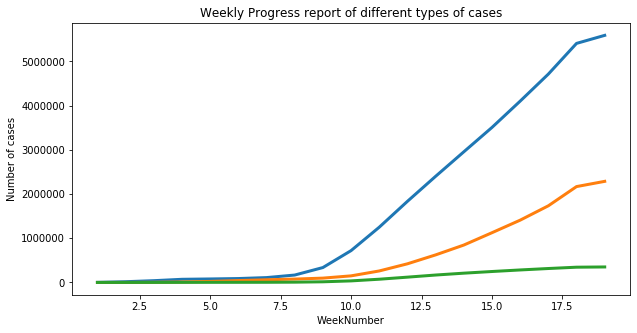

In [14]:
datewise["WeekofYear"]=datewise.index.weekofyear
week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
w=1
for i in list(datewise["WeekofYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1
    plt.figure(figsize=(10,5))
    plt.plot(week_num,weekwise_confirmed,linewidth=3)
    plt.plot(week_num,weekwise_recovered,linewidth=3)
    plt.plot(week_num,weekwise_deaths,linewidth=3)
    plt.xlabel("WeekNumber")
    plt.ylabel("Number of cases")
    plt.title("Weekly Progress report of different types of cases")
    

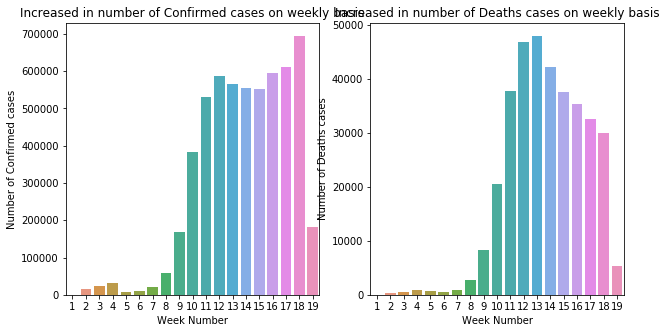

In [15]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
sns.barplot(x=week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed cases")
ax2.set_ylabel("Number of Deaths cases")
ax1.set_title("Increased in number of Confirmed cases on weekly basis")
ax2.set_title("Increased in number of Deaths cases on weekly basis")
plt.show()

In [16]:
india_data=df[df["Country"]=="India"]
datewise_india=india_data.groupby(["Date"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datewise_india.iloc[-1])
print("Total Active Cases",datewise_india["Confirmed"].iloc[-1]-datewise_india["Deaths"].iloc[-1]-datewise_india["Recovered"].iloc[-1])
print("Total Closed Cases",datewise_india["Deaths"].iloc[-1]+datewise_india["Recovered"].iloc[-1])

Confirmed    150793
Recovered     64277
Deaths         4344
Name: 2020-05-26 00:00:00, dtype: int64
Total Active Cases 82172
Total Closed Cases 68621


In [17]:
us_data=df[df["Country"]=="US"]
datewise_us=us_data.groupby(["Date"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datewise_us.iloc[-1])
print("Total Active Cases",datewise_us["Confirmed"].iloc[-1]-datewise_us["Deaths"].iloc[-1]-datewise_us["Recovered"].iloc[-1])
print("Total Closed Cases",datewise_us["Deaths"].iloc[-1]+datewise_us["Recovered"].iloc[-1])

Confirmed    1680913
Recovered     384902
Deaths         98913
Name: 2020-05-26 00:00:00, dtype: int64
Total Active Cases 1197098
Total Closed Cases 483815


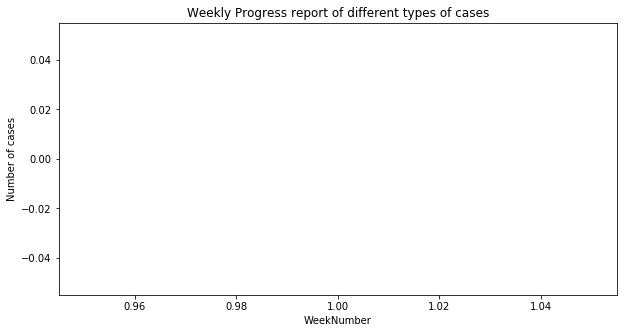

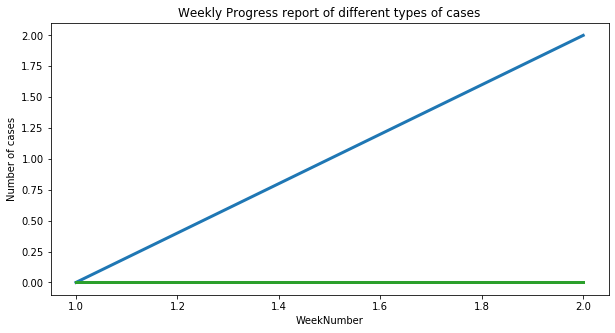

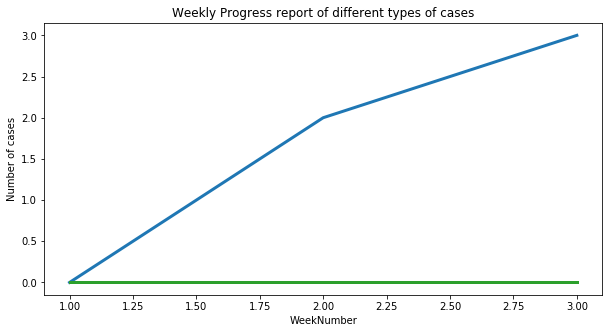

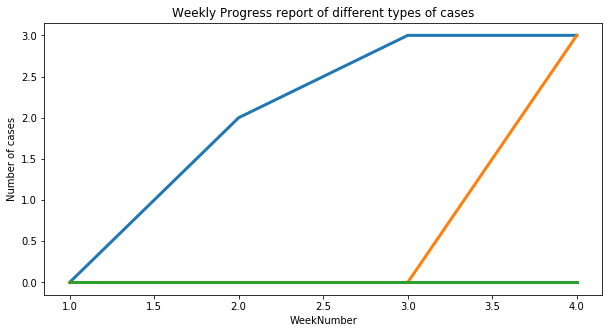

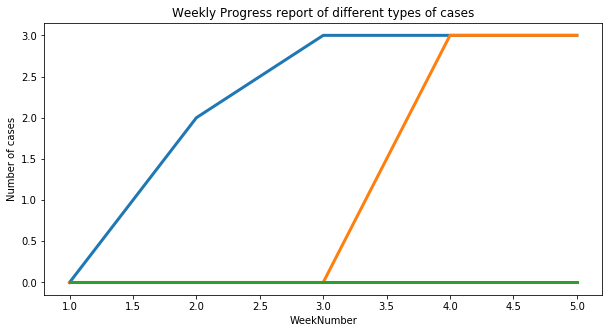

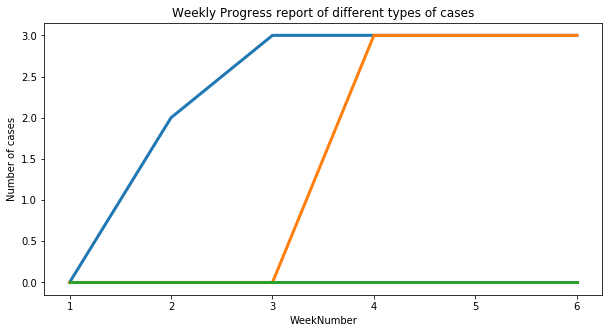

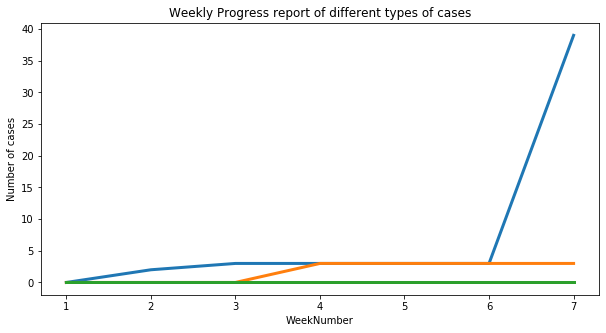

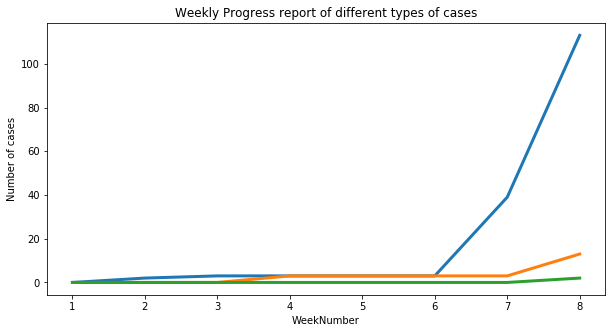

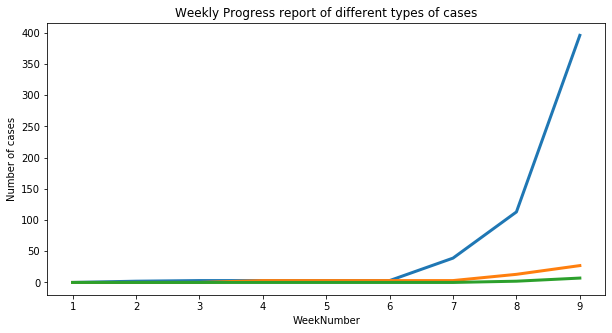

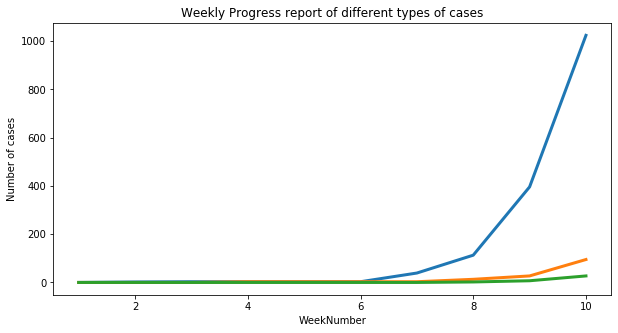

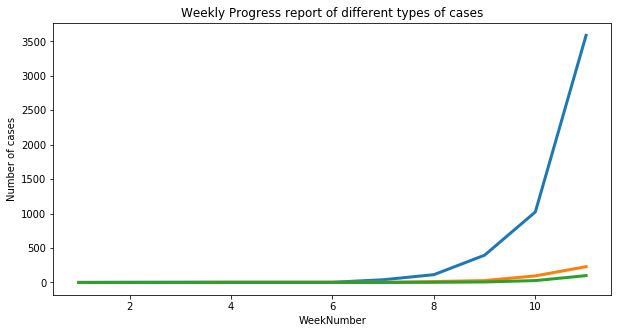

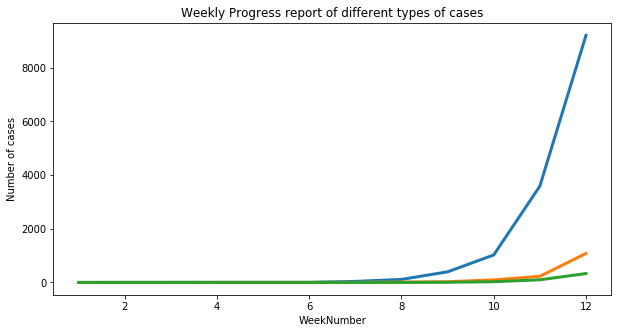

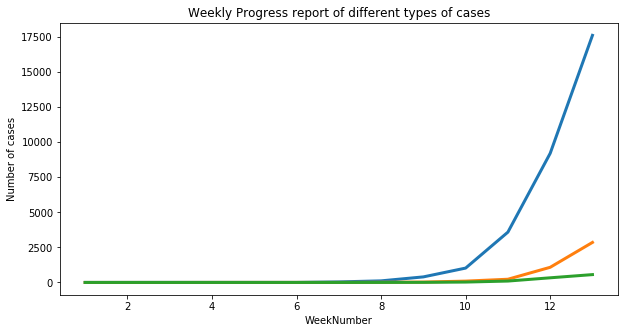

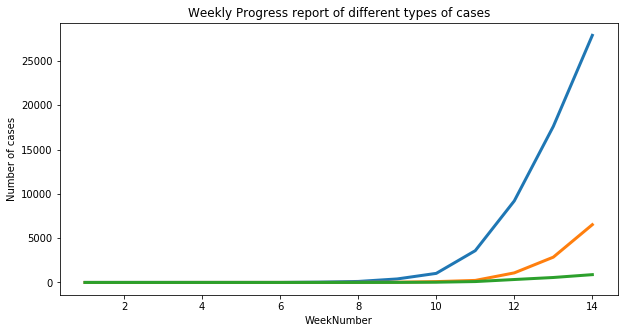

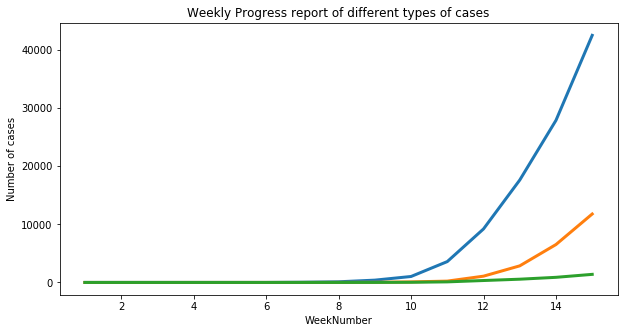

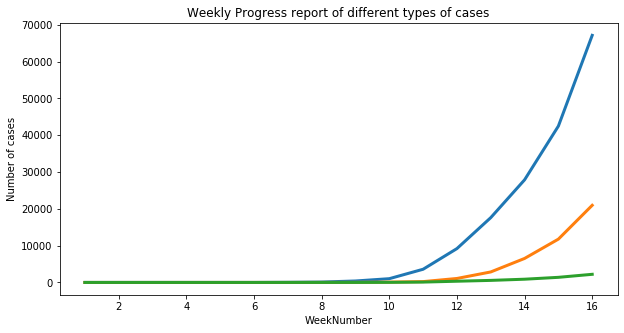

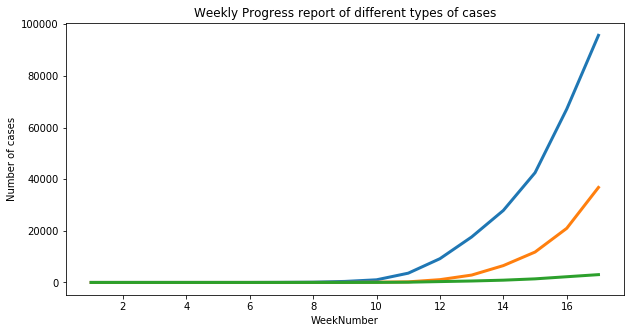

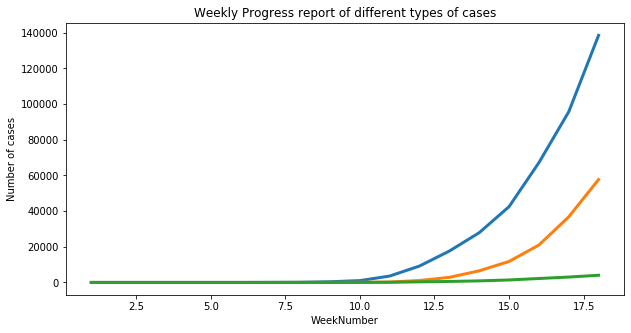

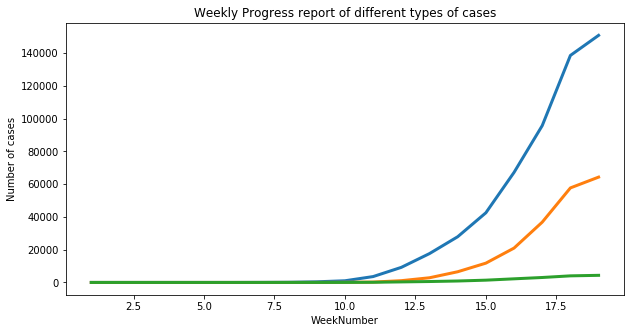

In [18]:
datewise_india["WeekofYear"]=datewise_india.index.weekofyear
week_num_india=[]
india_weekwise_confirmed=[]
india_weekwise_recovered=[]
india_weekwise_deaths=[]
w=1
for i in list(datewise_india["WeekofYear"].unique()):
    india_weekwise_confirmed.append(datewise_india[datewise_india["WeekofYear"]==i]["Confirmed"].iloc[-1])
    india_weekwise_recovered.append(datewise_india[datewise_india["WeekofYear"]==i]["Recovered"].iloc[-1])
    india_weekwise_deaths.append(datewise_india[datewise_india["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_india.append(w)
    w=w+1
    plt.figure(figsize=(10,5))
    plt.plot(week_num_india,india_weekwise_confirmed,linewidth=3)
    plt.plot(week_num_india,india_weekwise_recovered,linewidth=3)
    plt.plot(week_num_india,india_weekwise_deaths,linewidth=3)
    plt.xlabel("WeekNumber")
    plt.ylabel("Number of cases")
    plt.title("Weekly Progress report of different types of cases")
    

In [19]:
max_ind=datewise_india["Confirmed"].max()
china_data=df[df["Country"]=="China"]
italy_data=df[df["Country"]=="Italy"]
us_data=df[df["Country"]=="US"]
france_data=df[df["Country"]=="France"]
datewise_china=china_data.groupby(["Date"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_italy=italy_data.groupby(["Date"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_us=us_data.groupby(["Date"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_france=france_data.groupby(["Date"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print("It Took",datewise_india[datewise_india["Confirmed"]>0].shape[0],"days in India to reach",max_ind,"Confirmed Cases")
print("It Took",datewise_china[datewise_china["Confirmed"]>0&(datewise_china["Confirmed"]<=max_ind)].shape[0],"days in China to reach Confirmed Cases")
print("It Took",datewise_italy[datewise_italy["Confirmed"]>0&(datewise_italy["Confirmed"]<=max_ind)].shape[0],"days in Italy to reach Confirmed Cases")
print("It Took",datewise_us[datewise_us["Confirmed"]>0&(datewise_us["Confirmed"]<=max_ind)].shape[0],"days in us to reach Confirmed Cases")
print("It Took",datewise_france[datewise_france["Confirmed"]>0&(datewise_france["Confirmed"]<=max_ind)].shape[0],"days in france to reach Confirmed Cases")


It Took 118 days in India to reach 150793 Confirmed Cases
It Took 126 days in China to reach Confirmed Cases
It Took 117 days in Italy to reach Confirmed Cases
It Took 126 days in us to reach Confirmed Cases
It Took 124 days in france to reach Confirmed Cases


In [20]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]=datewise["Days Since"].dt.days
train_ml=datewise.iloc[:int(datewise.shape[0]*0.90)]
test_ml=datewise.iloc[:int(datewise.shape[0]*0.90):]
model_scores=[]

In [21]:
regressor=LinearRegression(normalize=True)
svm=SVR(C=1,degree=5,kernel='poly',epsilon=0.001)
regressor.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

SVR(C=1, cache_size=200, coef0=0.0, degree=5, epsilon=0.001, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [22]:
prediction_test_regressor=regressor.predict(np.array(test_ml["Days Since"]).reshape(-1,1))
prediction_test_svm=svm.predict(np.array(test_ml["Days Since"]).reshape(-1,1))

In [23]:
new_date = []
new_prediction_lr = []
new_prediction_svm = []
for i in range(1,20):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_lr.append(regressor.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
    new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
    pd.set_option("display.float_format",lambda x: '%.f' % x)
    model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns = ["Date","LR","SVR"])                         

In [24]:
model_predictions.head(15)

,Date,LR,SVR
0,2020-05-27,3703298,7711001
1,2020-05-28,3740572,8018559
2,2020-05-29,3777847,8335958
3,2020-05-30,3815121,8663433
4,2020-05-31,3852395,9001220
5,2020-06-01,3889669,9349563
6,2020-06-02,3926943,9708706
7,2020-06-03,3964217,10078898
8,2020-06-04,4001491,10460393
9,2020-06-05,4038765,10853448


In [25]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.90)]
test=datewise.iloc[int(datewise.shape[0]*0.90):]

In [26]:
holt=Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=1.4,smoothing_slope=0.2)
y_pred=test.copy()
y_pred["Holt"]=holt.forecast(len(test))

In [27]:
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,20):
    holt_new_date.append(datewise.index[-1]+timedelta(days=i))
    holt_new_prediction.append(holt.forecast((len(test)+i))[-1])
model_predictions["Holt Linear Model Prediction"]=holt_new_prediction

In [28]:
model_predictions.head()

,Date,LR,SVR,Holt Linear Model Prediction
0,2020-05-27,3703298,7711001,5512726
1,2020-05-28,3740572,8018559,5595981
2,2020-05-29,3777847,8335958,5679235
3,2020-05-30,3815121,8663433,5762489
4,2020-05-31,3852395,9001220,5845744
